In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
 
from sklearn.model_selection import train_test_split
 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/U.S.%20Gasoline%20and%20Diesel%20Retail%20Prices%201995-2021/PET_PRI_GND_DCUS_NUS_W.csv")
df.Date = pd.to_datetime(df.Date, format="%m/%d/%Y")
df

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995-01-02,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995-01-09,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995-01-16,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995-01-23,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995-01-30,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2020-12-28,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,2021-01-04,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,2021-01-11,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,2021-01-18,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


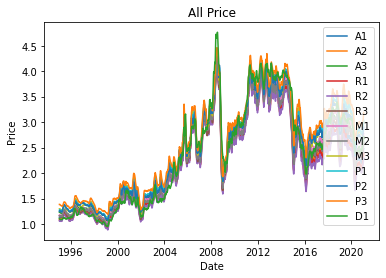

<Figure size 1080x1080 with 0 Axes>

In [4]:
plt.plot(df.Date, df.A1)
plt.plot(df.Date, df.A2)
plt.plot(df.Date, df.A3)
plt.plot(df.Date, df.R1)
plt.plot(df.Date, df.R2)
plt.plot(df.Date, df.R3)
plt.plot(df.Date, df.M1)
plt.plot(df.Date, df.M2)
plt.plot(df.Date, df.M3)
plt.plot(df.Date, df.P1)
plt.plot(df.Date, df.P2)
plt.plot(df.Date, df.P3)
plt.plot(df.Date, df.D1)
plt.title('All Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['A1','A2','A3','R1','R2','R3','M1','M2','M3','P1','P2','P3','D1'])
plt.figure(figsize=(15,15))
plt.show()

In [5]:
df['avg'] = df.A1 + df.A2 + df.A3 + df.R1 + df.R2 + df.R3 + df.M1 + df.M2 + df.M3 + df.P1 + df.P2 + df.P3 + df.D1
df.avg = df.avg / 13
df

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,avg
0,1995-01-02,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,1.185385
1,1995-01-09,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,1.189769
2,1995-01-16,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,1.184231
3,1995-01-23,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,1.186769
4,1995-01-30,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,1.184154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2020-12-28,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635,2.554846
1357,2021-01-04,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640,2.561231
1358,2021-01-11,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670,2.623538
1359,2021-01-18,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696,2.681692


<AxesSubplot:xlabel='Date'>

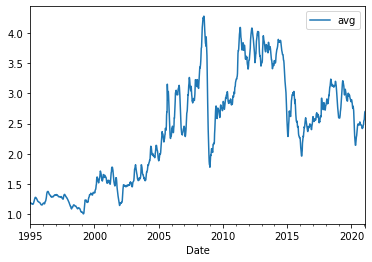

In [6]:
df.plot(x="Date", y="avg")

In [7]:
df['Rol5'] = df.avg.rolling(5).mean()
df['Rol20'] = df.avg.rolling(20).mean()
df['Rol3'] = df.avg.rolling(3).mean()
df = df.dropna()
df

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,avg,Rol5,Rol20,Rol3
19,1995-05-15,1.226,1.213,1.273,1.179,1.173,1.215,1.269,1.267,1.334,1.364,1.357,1.418,1.126,1.262615,1.235462,1.193115,1.249846
20,1995-05-22,1.244,1.232,1.285,1.197,1.191,1.233,1.288,1.285,1.344,1.383,1.376,1.429,1.124,1.277769,1.250169,1.197735,1.264692
21,1995-05-29,1.246,1.234,1.291,1.199,1.193,1.239,1.290,1.288,1.351,1.386,1.379,1.435,1.130,1.281615,1.261785,1.202327,1.274000
22,1995-06-05,1.246,1.234,1.289,1.199,1.194,1.238,1.290,1.288,1.349,1.386,1.380,1.434,1.124,1.280846,1.271308,1.207158,1.280077
23,1995-06-12,1.243,1.230,1.287,1.196,1.190,1.237,1.288,1.286,1.348,1.383,1.375,1.433,1.122,1.278308,1.276231,1.211735,1.280256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2020-12-28,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635,2.554846,2.499692,2.477958,2.524487
1357,2021-01-04,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640,2.561231,2.522431,2.482115,2.551231
1358,2021-01-11,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670,2.623538,2.551646,2.488669,2.579872
1359,2021-01-18,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696,2.681692,2.591785,2.496404,2.622154


<AxesSubplot:xlabel='Date'>

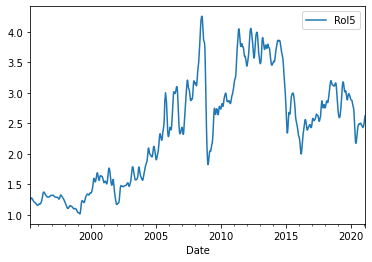

In [8]:
df.plot(x='Date',y='Rol5')

<AxesSubplot:xlabel='Date'>

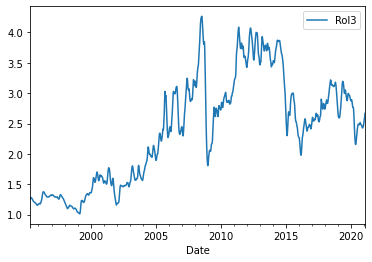

In [9]:
df.plot(x='Date',y='Rol3')

<AxesSubplot:xlabel='Date'>

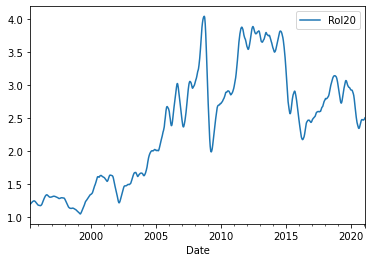

In [10]:
df.plot(x='Date',y='Rol20')

<ipython-input-11-638f2a8f8557>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rol50'] = df.avg.rolling(100).mean()


<AxesSubplot:xlabel='Date'>

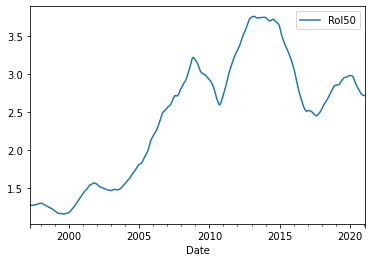

In [11]:
df['Rol50'] = df.avg.rolling(100).mean()
df.dropna().plot(x='Date',y='Rol50')

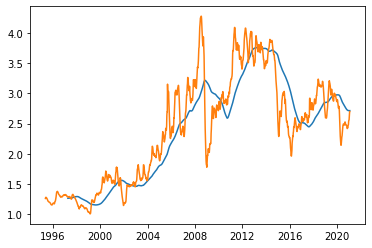

In [12]:
plt.plot(df.Date, df.Rol50)
plt.plot(df.Date, df.avg)
plt.show()

In [13]:
dateTest = '2012-01-04'
y1 = df.loc[df.Date < dateTest, 'Rol50'].tail(1).item()
y2 = df.loc[df.Date >= dateTest, 'Rol50'].head(1).item()
m = y2 - y1
pred = df.loc[df.Date >= dateTest, 'Rol50'].head(2).tail(1).item()
df['slopePred'] = df.Rol50 + m
df

<ipython-input-13-4ccb3b3131af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slopePred'] = df.Rol50 + m


,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,avg,Rol5,Rol20,Rol3,Rol50,slopePred
19,1995-05-15,1.226,1.213,1.273,1.179,1.173,1.215,1.269,1.267,1.334,1.364,1.357,1.418,1.126,1.262615,1.235462,1.193115,1.249846,NaN,NaN
20,1995-05-22,1.244,1.232,1.285,1.197,1.191,1.233,1.288,1.285,1.344,1.383,1.376,1.429,1.124,1.277769,1.250169,1.197735,1.264692,NaN,NaN
21,1995-05-29,1.246,1.234,1.291,1.199,1.193,1.239,1.290,1.288,1.351,1.386,1.379,1.435,1.130,1.281615,1.261785,1.202327,1.274000,NaN,NaN
22,1995-06-05,1.246,1.234,1.289,1.199,1.194,1.238,1.290,1.288,1.349,1.386,1.380,1.434,1.124,1.280846,1.271308,1.207158,1.280077,NaN,NaN
23,1995-06-12,1.243,1.230,1.287,1.196,1.190,1.237,1.288,1.286,1.348,1.383,1.375,1.433,1.122,1.278308,1.276231,1.211735,1.280256,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2020-12-28,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635,2.554846,2.499692,2.477958,2.524487,2.713371,2.721006
1357,2021-01-04,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640,2.561231,2.522431,2.482115,2.551231,2.713085,2.720721
1358,2021-01-11,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670,2.623538,2.551646,2.488669,2.579872,2.713258,2.720894
1359,2021-01-18,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696,2.681692,2.591785,2.496404,2.622154,2.713672,2.721307


In [14]:
df.slopePred = df.Rol50.diff()
df

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,avg,Rol5,Rol20,Rol3,Rol50,slopePred
19,1995-05-15,1.226,1.213,1.273,1.179,1.173,1.215,1.269,1.267,1.334,1.364,1.357,1.418,1.126,1.262615,1.235462,1.193115,1.249846,NaN,NaN
20,1995-05-22,1.244,1.232,1.285,1.197,1.191,1.233,1.288,1.285,1.344,1.383,1.376,1.429,1.124,1.277769,1.250169,1.197735,1.264692,NaN,NaN
21,1995-05-29,1.246,1.234,1.291,1.199,1.193,1.239,1.290,1.288,1.351,1.386,1.379,1.435,1.130,1.281615,1.261785,1.202327,1.274000,NaN,NaN
22,1995-06-05,1.246,1.234,1.289,1.199,1.194,1.238,1.290,1.288,1.349,1.386,1.380,1.434,1.124,1.280846,1.271308,1.207158,1.280077,NaN,NaN
23,1995-06-12,1.243,1.230,1.287,1.196,1.190,1.237,1.288,1.286,1.348,1.383,1.375,1.433,1.122,1.278308,1.276231,1.211735,1.280256,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2020-12-28,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635,2.554846,2.499692,2.477958,2.524487,2.713371,-0.000385
1357,2021-01-04,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640,2.561231,2.522431,2.482115,2.551231,2.713085,-0.000285
1358,2021-01-11,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670,2.623538,2.551646,2.488669,2.579872,2.713258,0.000173
1359,2021-01-18,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696,2.681692,2.591785,2.496404,2.622154,2.713672,0.000413


In [15]:
df.slopePred = df.Rol50 + df.slopePred

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


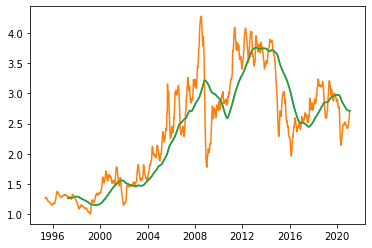

In [16]:
plt.plot(df.Date, df.Rol50)
plt.plot(df.Date, df.avg)
plt.plot(df.Date, df.slopePred)
plt.show()

In [17]:
df.Rol50

19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
          ...   
1356    2.713371
1357    2.713085
1358    2.713258
1359    2.713672
1360    2.713648
Name: Rol50, Length: 1342, dtype: float64

In [18]:
oilPred = df[['Date','avg','Rol50']]
oilPred = oilPred.dropna()
oilPred

,Date,avg,Rol50
118,1997-04-07,1.295077,1.266332
119,1997-04-14,1.292231,1.266628
120,1997-04-21,1.290538,1.266756
121,1997-04-28,1.286077,1.266801
122,1997-05-05,1.284308,1.266835
...,...,...,...
1356,2020-12-28,2.554846,2.713371
1357,2021-01-04,2.561231,2.713085
1358,2021-01-11,2.623538,2.713258
1359,2021-01-18,2.681692,2.713672


<AxesSubplot:xlabel='Date'>

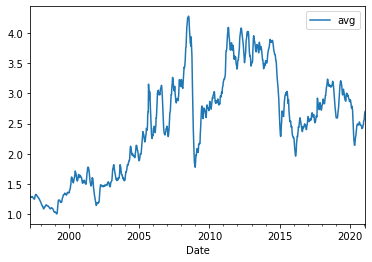

In [19]:
oilPred.plot(x='Date',y='avg')

<AxesSubplot:xlabel='Date'>

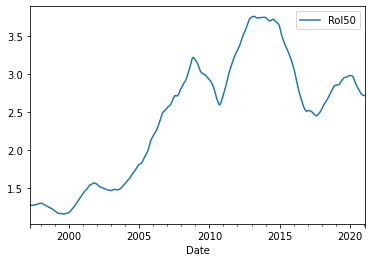

In [20]:
oilPred.plot(x='Date',y='Rol50')

In [21]:
oilPred['Up'] = oilPred.Rol50.shift(1)
oilPred

,Date,avg,Rol50,Up
118,1997-04-07,1.295077,1.266332,NaN
119,1997-04-14,1.292231,1.266628,1.266332
120,1997-04-21,1.290538,1.266756,1.266628
121,1997-04-28,1.286077,1.266801,1.266756
122,1997-05-05,1.284308,1.266835,1.266801
...,...,...,...,...
1356,2020-12-28,2.554846,2.713371,2.713755
1357,2021-01-04,2.561231,2.713085,2.713371
1358,2021-01-11,2.623538,2.713258,2.713085
1359,2021-01-18,2.681692,2.713672,2.713258


In [22]:
oilPred['Dev1'] = oilPred.Rol50 - oilPred.Up
oilPred['pred'] = oilPred.Rol50 + oilPred.Dev1
oilPred['pred'] = oilPred['pred'].shift(1)
oilPred['error'] = oilPred.Rol50 - oilPred.pred
oilPred

,Date,avg,Rol50,Up,Dev1,pred,error
118,1997-04-07,1.295077,1.266332,NaN,NaN,NaN,NaN
119,1997-04-14,1.292231,1.266628,1.266332,0.000296,NaN,NaN
120,1997-04-21,1.290538,1.266756,1.266628,0.000128,1.266925,-0.000168
121,1997-04-28,1.286077,1.266801,1.266756,0.000045,1.266884,-0.000083
122,1997-05-05,1.284308,1.266835,1.266801,0.000035,1.266845,-0.000010
...,...,...,...,...,...,...,...
1356,2020-12-28,2.554846,2.713371,2.713755,-0.000385,2.713181,0.000190
1357,2021-01-04,2.561231,2.713085,2.713371,-0.000285,2.712986,0.000099
1358,2021-01-11,2.623538,2.713258,2.713085,0.000173,2.712800,0.000458
1359,2021-01-18,2.681692,2.713672,2.713258,0.000413,2.713432,0.000240


In [23]:
oilPred.describe()

,avg,Rol50,Up,Dev1,pred,error
count,1243.000000,1243.000000,1242.000000,1242.000000,1241.000000,1.241000e+03
mean,2.480892,2.429321,2.429092,0.001165,2.431195,-2.572367e-07
std,0.850905,0.822473,0.822764,0.006456,0.821860,6.773434e-04
min,1.007462,1.155253,1.155253,-0.017697,1.154950,-4.909231e-03
25%,1.641692,1.527485,1.527454,-0.002270,1.529113,-3.130769e-04
50%,2.541077,2.621764,2.621743,0.001192,2.622255,2.230769e-05
75%,3.063962,2.988980,2.989413,0.005596,2.989814,3.223077e-04
max,4.273385,3.756568,3.756568,0.016267,3.757678,4.737692e-03


In [24]:
oilModelTest = oilPred[['Date','avg','Rol50']]
oilModelTest['Shift1'] = oilModelTest.Rol50.shift(1)
oilModelTest['Shift2'] = oilModelTest.Rol50.shift(2)
oilModelTest['Shift3'] = oilModelTest.Rol50.shift(3)
oilModelTest['Shift4'] = oilModelTest.Rol50.shift(4)
oilModelTest['Shift5'] = oilModelTest.Rol50.shift(5)
oilModelTest = oilModelTest.dropna()
oilModelTest

<ipython-input-24-68da64b6038e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oilModelTest['Shift1'] = oilModelTest.Rol50.shift(1)
<ipython-input-24-68da64b6038e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oilModelTest['Shift2'] = oilModelTest.Rol50.shift(2)
<ipython-input-24-68da64b6038e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,Date,avg,Rol50,Shift1,Shift2,Shift3,Shift4,Shift5
123,1997-05-12,1.281385,1.266866,1.266835,1.266801,1.266756,1.266628,1.266332
124,1997-05-19,1.287615,1.267015,1.266866,1.266835,1.266801,1.266756,1.266628
125,1997-05-26,1.294154,1.267287,1.267015,1.266866,1.266835,1.266801,1.266756
126,1997-06-02,1.294692,1.267632,1.267287,1.267015,1.266866,1.266835,1.266801
127,1997-06-09,1.289462,1.268006,1.267632,1.267287,1.267015,1.266866,1.266835
...,...,...,...,...,...,...,...,...
1356,2020-12-28,2.554846,2.713371,2.713755,2.714330,2.715477,2.716657,2.718442
1357,2021-01-04,2.561231,2.713085,2.713371,2.713755,2.714330,2.715477,2.716657
1358,2021-01-11,2.623538,2.713258,2.713085,2.713371,2.713755,2.714330,2.715477
1359,2021-01-18,2.681692,2.713672,2.713258,2.713085,2.713371,2.713755,2.714330


In [25]:
model = LinearRegression()
x = oilModelTest[['Shift1','Shift2','Shift3','Shift4','Shift5']]
y = oilModelTest.Rol50
train_x, test_x, train_y, test_y = train_test_split(x, y)
model.fit(train_x, train_y)
predictions = model.predict( test_x )

mean_absolute_error(test_y, predictions)

0.0003540173264091259